Bagging (boostrap aggregating) is also an ensemble method, closely related to majority and plurality voting. The specialization to bagging happens when each of the $n$ classifiers in the ensemble gets a different training set. The training set for each classifier is generated via boostrap sampling the training dataset (sample with replacement).

This typically makes the classifiers more robust: https://inspirehep.net/literature/1088512 (the original paper).

Scikit-Learn has bagging implemented.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

import os

original_dir = os.getcwd()
os.chdir('..')

from decision_plotting import DecisionRegionPlotter
os.chdir(original_dir)

drp = DecisionRegionPlotter()

In [2]:
rnd_state = 1

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
 'OD280/OD315 of diluted wines', 'Proline']

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
le = LabelEncoder()
y = le.fit_transform(y)
# This is the true test set. The split inside the sequential backward selection is for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [3]:
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier(criterion='entropy', random_state=rnd_state, max_depth=None)

bag = BaggingClassifier(estimator=tree,
                        n_estimators=500, # Number of classifier copies
                        max_samples=1.0, # 1.0 * Number of Training Examples at most for each "bag"
                        max_features=1.0, # 1.0 * Number of features at most for each "bag"
                        n_jobs=-1,
                        random_state=rnd_state)

In [4]:
tree = tree.fit(X_train, y_train)

tree_acc_train = accuracy_score(y_train, tree.predict(X_train))
tree_acc_test = accuracy_score(y_test, tree.predict(X_test))

print(f"Training accuracy on the single tree: {tree_acc_train:.3f}")
print(f"Test accuracy on the single tree: {tree_acc_test:.3f}")

Training accuracy on the single tree: 1.000
Test accuracy on the single tree: 0.907


In [5]:
bag = bag.fit(X_train, y_train)

bag_acc_train = accuracy_score(y_train, bag.predict(X_train))
bag_acc_test = accuracy_score(y_test, bag.predict(X_test))

print(f"Training accuracy on the bag: {bag_acc_train:.3f}")
print(f"Test accuracy on the bag: {bag_acc_test:.3f}")

Training accuracy on the bag: 1.000
Test accuracy on the bag: 1.000


Processed 73264 predictions in 8 batches


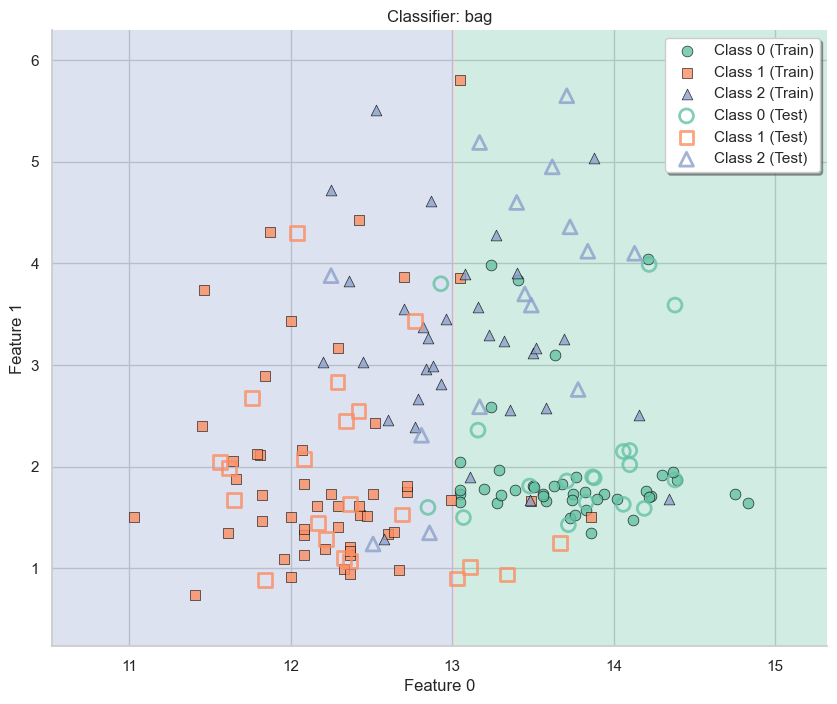

Processed 73264 predictions in 8 batches


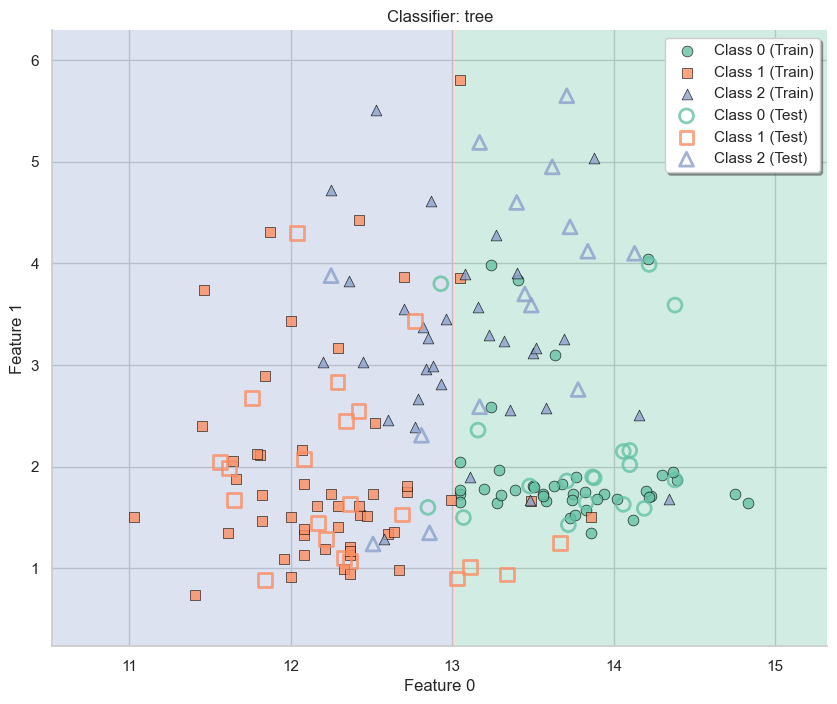

In [6]:
drp.plot_decision_regions(classifier=bag, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
plt.title(f"Classifier: bag")
plt.show()

drp.plot_decision_regions(classifier=tree, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)
plt.title(f"Classifier: tree")
plt.show()